In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from six.moves import cPickle as pickle
import nltk

In [3]:
data_root = "../data/datasets/amazon-fine-food-reviews"
# embeddings_root = "../data/glove/glove.6b"

In [4]:
# Load Data
data = pd.read_csv(data_root + "/Reviews.csv")

In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
pd.options.display.max_colwidth = 500
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [7]:
# pd.get_dummies(data['Score'])

In [8]:
data = data[['Text', 'Score']]

In [9]:
data.head()

,Text,Score
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",1
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters ...",4
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",5


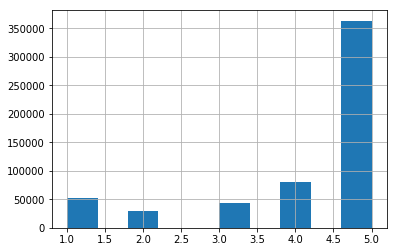

In [10]:
data.Score.hist()

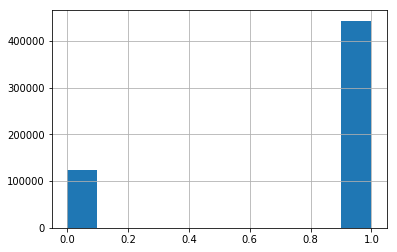

In [11]:
# map the score to be positive or negative(> 3 positive else negative)
data["Score"] = data["Score"].apply(lambda x: 1 if x > 3 else 0)
data.Score.hist()

In [11]:
# data = data.as_matrix()

In [12]:
# print(data[0])

[ 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
 1]


In [13]:
# def split_pos_neg(d):
#     pos_mask = d[:, 1] == 1
#     pos = d[pos_mask, :]
#     neg = d[~pos_mask, :]
#     return pos, neg

In [14]:
# pos, neg = split_pos_neg(data)

# print("Numbner of positive ratings:", pos.shape[0])
# print("Numbner of negative ratings:", neg.shape[0])

Numbner of positive ratings: 443777
Numbner of negative ratings: 124677


In [15]:
# # under-sampling the data
# def under_sampling(c1, c2):
#     m = min(c1.shape[0], c2.shape[0])
#     return c1[:m], c2[:m]

In [16]:
# pos, neg = under_sampling(pos, neg)
# print("Numbner of positive ratings:", pos.shape[0])
# print("Numbner of negative ratings:", neg.shape[0])

Numbner of positive ratings: 124677
Numbner of negative ratings: 124677


In [17]:
# # creating the dataset
# data = np.concatenate((pos, neg), axis=0)

In [18]:
# labels = data[:, 1]
# data = data[:, 0]

In [19]:
# def data_distribution_plot(labels, step):
#     r = range(0, labels.shape[0], step) 
#     fig = plt.figure()  
#     ax = fig.add_subplot(111)
#     ax.bar(range(len(r)), labels[r])
#     plt.show()

# def data_histogram_plot(data):
#     fig = plt.figure()  
#     ax = fig.add_subplot(111)  
#     ax.hist(data)
#     plt.show()

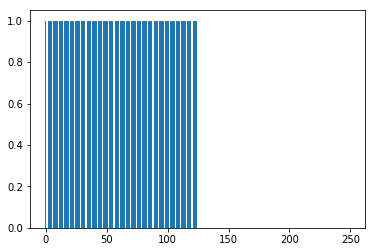

In [20]:
data_distribution_plot(labels, 1000)

In [21]:
# # Shuffle the data
# def randomize(comments, labels):
#     perm = np.random.permutation(labels.shape[0])
#     shuffled_comments = comments[perm]
#     shuffled_labels = labels[perm]
#     return shuffled_comments, shuffled_labels

In [22]:
# data, labels = randomize(data, labels)

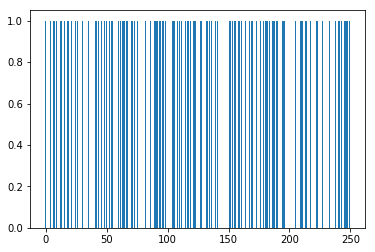

In [23]:
# data_distribution_plot(labels, 1000)

In [24]:
# def one_hot(labels):
#     one_hot_labels = np.zeros(shape=(labels.shape[0], 2), dtype='int32')
#     for i in range(len(labels)):
#         if (labels[i] == 0):
#             one_hot_labels[i][0] = 1
#         else:
#             one_hot_labels[i][1] = 1 
#     return one_hot_labels

In [25]:
# labels = one_hot(labels)
# print(labels.shape)

(249354, 2)


In [26]:
# def tokenize(data):
#     data_len = np.zeros((data.shape[0]), dtype='int32')
#     tokenized_data = []
#     tokenizer = nltk.TweetTokenizer()
#     for i in range(data.shape[0]):
#         tokens = tokenizer.tokenize(data[i])
#         tokenized_data.append(tokens)
#         data_len[i] = len(tokens)
#     return np.array(tokenized_data), data_len
        

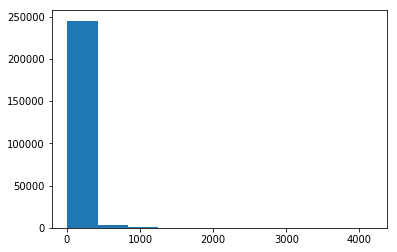

In [27]:
# data, data_len = tokenize(data)
# data_histogram_plot(data_len)

In [28]:
# def normalize(data_len):
#     std = np.std(data_len)
#     mean = np.mean(data_len)
#     return np.where(data_len <= mean + std / 4)

Current rows: 190528
Max length: 126


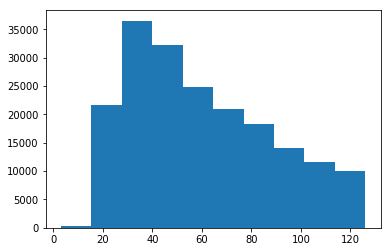

In [30]:
# normal = normalize(data_len)

# labels = labels[normal, :]
# data = data[normal]
# data_len = data_len[normal]

# print("Current rows:", len(normal[0]))
# print("Max length:", np.amax(data_len))
# data_histogram_plot(data_len)

In [35]:
# def vocabulary(data):
#     vocab = set()
#     vocab_dict = {}
#     vocab_dict["<PAD>"] = 0
#     for comment in data:
#         for word in comment:
#             vocab.add(word)
#     for idx, word in enumerate(vocab):
#         vocab_dict[word] = idx + 1
#     return vocab, vocab_dict

In [36]:
# vocab, vocab_dict = vocabulary(data)

In [37]:
# print(len(vocab))
# print(vocab_dict['<PAD>'])

93107
0


In [38]:
# def word2idx(data, vocab_dict, sequence_length):
#     x = np.zeros(shape=(data.shape[0], sequence_length), dtype="int32")
#     for i in range(data.shape[0]):
#         sequence = data[i]
#         for j in range(len(sequence)):
#             word = sequence[j]
#             x[i][j] = vocab_dict[word]
#     return x

In [39]:
# sequence_length = np.amax(data_len)
# data = word2idx(data, vocab_dict, sequence_length)

In [40]:
print(data.shape)

(190528, 126)


In [30]:
# def load_glove_vectors(filename, vocab):
#     glove_dict = {}
#     with open(filename, encoding='utf8') as f:
#         embedding_dim = 0
#         for _, line in enumerate(f):
#             tokens = line.split(" ")
#             word = tokens[0]
#             entries = tokens[1:]
#             if not vocab or word in vocab:
#                 glove_dict[word] = [float(x) for x in entries]
#         return glove_dict

In [31]:
# embedding_dim = 50
# glove_dict = load_glove_vectors(embeddings_root + "/glove.6B.50d.txt", vocab)

In [32]:
# def build_embedding_matrix(vocab_dict, glove_dict, embedding_dim):
#     initial_embeddings = np.random.uniform(-0.25, 0.25, (len(vocab_dict), embedding_dim)).astype("float32")
#     for word, _ in glove_dict.items():
#         word_idx = vocab_dict[word]
#         initial_embeddings[word_idx, :] = glove_dict[word]
#     return initial_embeddings

In [33]:
# embedding_matrix = build_embedding_matrix(vocab_dict, glove_dict, embedding_dim)

In [34]:
# print(embedding_matrix.shape)

(102395, 50)


In [35]:
# def vectorize(data, vocab_dict, embedding_matrix, maxlen):
#     v_data = np.zeros(shape=(data.shape[0],maxlen , embedding_matrix.shape[1]), dtype="float32")
#     for i in range(data.shape[0]):
#         comment = data[i]
#         for j in range(len(comment)):
#             word = comment[j]
#             v_data[i][j] = embedding_matrix[vocab_dict[word]]
#     return v_data

In [37]:
# maxlen = np.amax(data_len)
# data = vectorize(data[:20000], vocab_dict, embedding_matrix, maxlen)

In [77]:
# print(vectorized_data.shape)

(20000, 152, 50)


In [78]:
# labels = labels[:20000]

In [41]:
# def train_validate_test_split(data, train_size=.6, valid_size=.2):
#     size = data.shape[0]
#     train_end = int(train_size * size)
#     valid_end = int(valid_size * size) + train_end
#     train = data[:train_end]
#     valid = data[train_end:valid_end]
#     test = data[valid_end:]
#     return train, valid, test

In [42]:
# X_train, X_valid, X_test = train_validate_test_split(data)
# y_train, y_valid, y_test = train_validate_test_split(labels)

In [43]:
# print('Training set', X_train.shape, y_train.shape)
# print('Validation set', X_valid.shape, y_valid.shape)
# print('Test set', X_test.shape, y_test.shape)

Training set (114316, 126) (114316, 2)
Validation set (38105, 126) (38105, 2)
Test set (38107, 126) (38107, 2)


In [81]:
# def data_histogram_plot(labels):
#     fig = plt.figure()  
#     ax = fig.add_subplot(111)  
#     ax.hist(labels)
#     plt.show()

In [85]:
# data_histogram_plot(y_train)
# data_histogram_plot(y_valid)
# data_histogram_plot(y_test)


In [44]:
# pickle_file = os.path.join(data_root, 'vocabulary.pickle')

# try:
#     f = open(pickle_file, 'wb')
#     save = {
#         'vocab_dict': vocab_dict,
#     }
#     pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
#     f.close()
# except Exception as e:
#     print('Unable to save data to', pickle_file, ':', e)
#     raise

In [45]:
# # Save the data
# pickle_file = os.path.join(data_root, 'Reviews.50d.pickle')

# try:
#     f = open(pickle_file, 'wb')
#     save = {
#         'X_train': X_train,
#         'y_train': y_train,
#         'X_valid': X_valid,
#         'y_valid': y_valid,
#         'X_test': X_test,
#         'y_test': y_test,
#     }
#     pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
#     f.close()
# except Exception as e:
#     print('Unable to save data to', pickle_file, ':', e)
#     raise